https://github.com/riku2002/PAMI.git

# Data preprocessing: 

In [5]:
import pandas as pd

# Read the air_pollution_data CSV file into a DataFrame
df = pd.read_csv('air_pollution_data.csv')

# Check the type of the data frame and make only columns of numeric type subject to the conditional operation.
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Replace the NaN values to zero.
df.fillna(0, inplace=True)

# Replace the values greater than or equal to 100 to zero
df.loc[:, numeric_cols][df.loc[:, numeric_cols] >= 100] = 0

# Replace existing values of this column with 1, 2, 3, ...
df['tid'] = range(1, len(df) + 1)  # Change 'timestamp' to 'tid'

# Drop the 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True)

# Move the 'tid' column to the beginning of the DataFrame
tid_col = df['tid']  # Extract the 'tid' column
df.drop(columns=['tid'], inplace=True)  # Remove 'tid' column from its original position
df.insert(0, 'tid', tid_col)  # Insert 'tid' column at the beginning of the DataFrame

# print(df)


In [6]:
from PAMI.extras.DF2DB import denseDF2DB as pro
import pandas as pd

# Initialize Dense2DB class
db =  pro.denseDF2DB(inputDF=df, thresholdValue=15, condition = '>=')

# Save as a transactional database file
db.createTransactional(outputFile='PM24HeavyPollutionRecordingSensors.csv')

# Obtain transactional database file names
print('The output file is saved at ' + db.getFileName())

The output file is saved at PM24HeavyPollutionRecordingSensors.csv


# Knowledge discovery:

In [7]:
from PAMI.frequentPattern.basic import FPGrowth as alg

inputFile = 'PM24HeavyPollutionRecordingSensors.csv'
minSup = 0
obj = alg.FPGrowth(inputFile, minSup)
obj.startMine()
obj.save('frequentPatterns.txt')

Frequent patterns were generated successfully using frequentPatternGrowth algorithm


# Visualization:

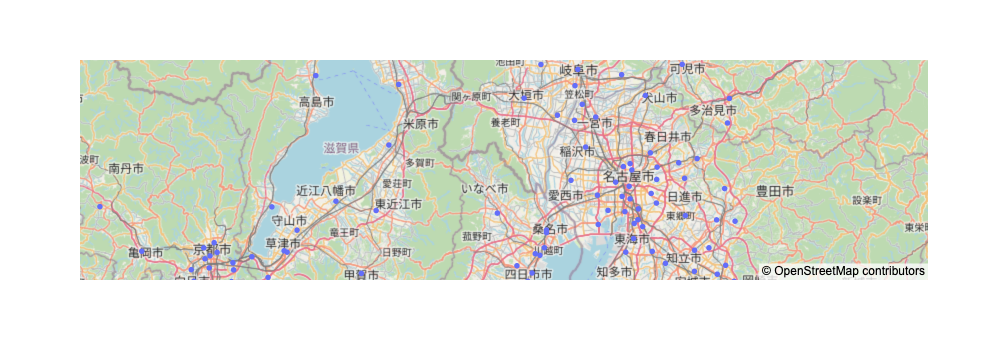

In [13]:
import re
import plotly.express as px

# Read the file to get a pattern
with open('frequentPatterns.txt', 'r') as file:
    patterns = file.readlines()

# Analyze the pattern to identify the longest pattern
max_pattern = []
max_length = 0
for pattern in patterns:
    # Obtain coordinates in the pattern
    coordinates = re.findall(r'Point\((.*?)\)', pattern)
    if len(coordinates) > max_length:
        max_pattern = coordinates
        max_length = len(coordinates)

# Display the longest pattern on Plotly Express Open Street Map
df = pd.DataFrame(max_pattern, columns=['coordinate'])
df[['Lon', 'Lat']] = df['coordinate'].str.split(' ', expand=True)
df['Lon'] = df['Lon'].astype(float)
df['Lat'] = df['Lat'].astype(float)

fig = px.scatter_mapbox(df, lat='Lat', lon='Lon', hover_name='coordinate')
fig.update_layout(mapbox_style='open-street-map')
fig.show()
